In [1]:

from __future__ import absolute_import, division, print_function, unicode_literals
import sys
sys.path.append("/Users/ryanmcclarren/DJINN/djinn")
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import math
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from sklearn import datasets
print(sklearn.__version__)
print(tf.__version__)
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import matplotlib
import math
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
font = fm.FontProperties()
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def hide_spines(intx=False,inty=False,logscale=0):
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties=font) 
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_yminorticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_ymajorticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            ax.set_title(ax.get_title(), fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (logscale):
                ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % (math.log(v,10)) )))
def show(nm,a=0,b=0,logscale=0):
    hide_spines(a,b,logscale)
    #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    #plt.yticks([1,1e-2,1e-4,1e-6,1e-8,1e-10,1e-12], labels)
    
    plt.savefig(nm);
    plt.show()
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
#this line is only needed in iPython notebooks
%matplotlib inline

0.24.2
2.6.0


In [2]:
%matplotlib inline
tmp1 = np.genfromtxt("concrete.csv" ,delimiter=",")
print(tmp1[0:10,:])
print(tmp1.shape)

[[ 540.      0.      0.    162.      2.5  1040.    676.     28.     79.99]
 [ 540.      0.      0.    162.      2.5  1055.    676.     28.     61.89]
 [ 332.5   142.5     0.    228.      0.    932.    594.    270.     40.27]
 [ 332.5   142.5     0.    228.      0.    932.    594.    365.     41.05]
 [ 198.6   132.4     0.    192.      0.    978.4   825.5   360.     44.3 ]
 [ 266.    114.      0.    228.      0.    932.    670.     90.     47.03]
 [ 380.     95.      0.    228.      0.    932.    594.    365.     43.7 ]
 [ 380.     95.      0.    228.      0.    932.    594.     28.     36.45]
 [ 266.    114.      0.    228.      0.    932.    670.     28.     45.85]
 [ 475.      0.      0.    228.      0.    932.    594.     28.     39.29]]
(1030, 9)


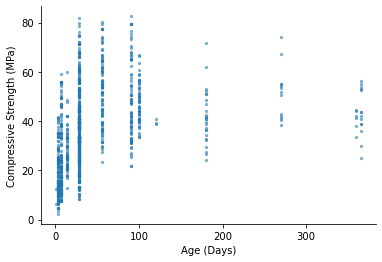

In [3]:
plt.scatter(tmp1[:,-2],tmp1[:,-1],s=5,alpha=0.5)
plt.xlabel("Age (Days)")
plt.ylabel("Compressive Strength (MPa)")
show("age.pdf")

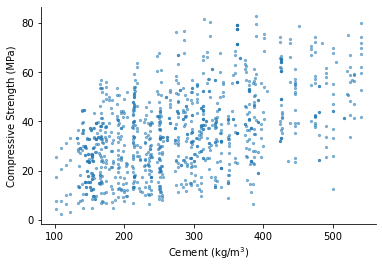

In [4]:
plt.scatter(tmp1[:,0],tmp1[:,-1],s=5,alpha=0.5)
plt.ylabel("Compressive Strength (MPa)")
plt.xlabel("Cement (kg/m$^3$)")
show("cement.pdf")

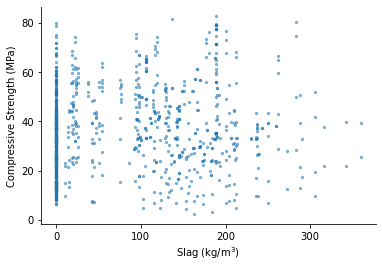

In [5]:
plt.scatter(tmp1[:,1],tmp1[:,-1],s=5,alpha=0.5)
plt.ylabel("Compressive Strength (MPa)")
plt.xlabel("Slag (kg/m$^3$)")
show("slag.pdf")

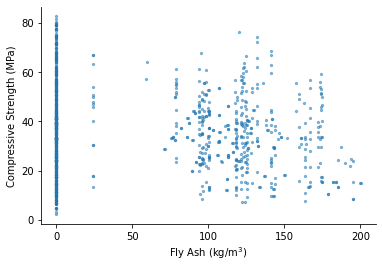

In [6]:
plt.scatter(tmp1[:,2],tmp1[:,-1],s=5,alpha=0.5)
plt.ylabel("Compressive Strength (MPa)")
plt.xlabel("Fly Ash (kg/m$^3$)")
show("ash.pdf")

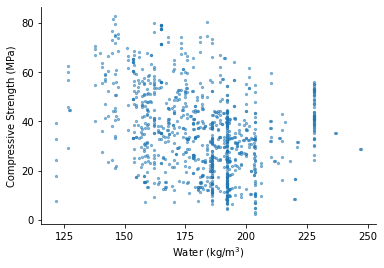

In [7]:
plt.scatter(tmp1[:,3],tmp1[:,-1],s=5,alpha=0.5)
plt.ylabel("Compressive Strength (MPa)")
plt.xlabel("Water (kg/m$^3$)")
show("water.pdf")

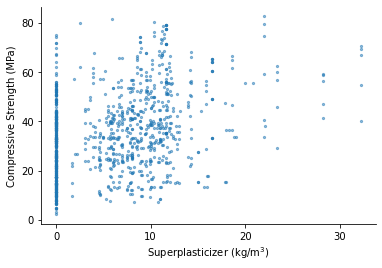

In [8]:
plt.scatter(tmp1[:,4],tmp1[:,-1],s=5,alpha=0.5)
plt.ylabel("Compressive Strength (MPa)")
plt.xlabel("Superplasticizer (kg/m$^3$)")
show("Superplasticizer.pdf")

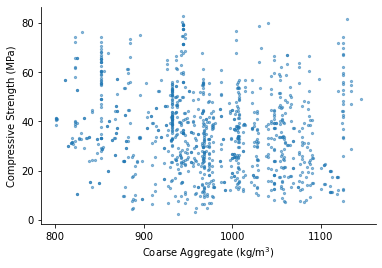

In [9]:
plt.scatter(tmp1[:,5],tmp1[:,-1],s=5,alpha=0.5)
plt.ylabel("Compressive Strength (MPa)")
plt.xlabel("Coarse Aggregate (kg/m$^3$)")
show("coarse.pdf")

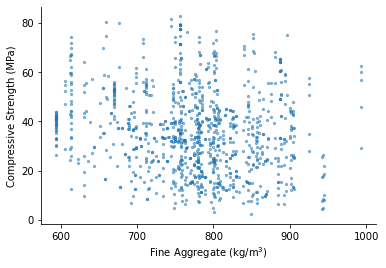

In [10]:
plt.scatter(tmp1[:,6],tmp1[:,-1],s=5,alpha=0.5)
plt.ylabel("Compressive Strength (MPa)")
plt.xlabel("Fine Aggregate (kg/m$^3$)")
show("fine.pdf")

In [11]:
#coeffs
a = np.mean([ 13.744,13.865,13.859, 13.838 ])
b = np.mean([-1.2648,-1.2712,-1.2749,-1.2673])
c = np.mean([.2688,.2758,.2583,.2702])
d = np.mean([.1408,.1308,.1377,.1359])
#add water to binder and lin mod
water2binder = tmp1[:,3]/(tmp1[:,0] + tmp1[:,2])
logDays = np.log(tmp1[:,-2])
tmp2 = np.column_stack([tmp1[:,0:-1],water2binder,logDays ,a*water2binder**b*(c*logDays+d), tmp1[:,-1]])
print(tmp2[0:2,:],tmp1[0:2,:],np.min(tmp1[:,-2]))
tmp_norm = tf.keras.utils.normalize(tmp2,axis=0)

def build_model(inp_shape=8):
  model = keras.Sequential([
    layers.Dense(8, activation=tf.nn.tanh, input_shape=[inp_shape],
                kernel_initializer=initializers.glorot_normal(seed=42),
                bias_initializer=initializers.glorot_normal(seed=42),
                kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(1,kernel_initializer=initializers.glorot_normal(seed=42),
                bias_initializer=initializers.glorot_normal(seed=42),
                kernel_regularizer=keras.regularizers.l2(0.001))
  ])


  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        0.001,
        decay_steps=100,
        decay_rate=0.96,
        staircase=True)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)# RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model


[[5.40000000e+02 0.00000000e+00 0.00000000e+00 1.62000000e+02
  2.50000000e+00 1.04000000e+03 6.76000000e+02 2.80000000e+01
  3.00000000e-01 3.33220451e+00 6.56862392e+01 7.99900000e+01]
 [5.40000000e+02 0.00000000e+00 0.00000000e+00 1.62000000e+02
  2.50000000e+00 1.05500000e+03 6.76000000e+02 2.80000000e+01
  3.00000000e-01 3.33220451e+00 6.56862392e+01 6.18900000e+01]] [[ 540.      0.      0.    162.      2.5  1040.    676.     28.     79.99]
 [ 540.      0.      0.    162.      2.5  1055.    676.     28.     61.89]] 1.0


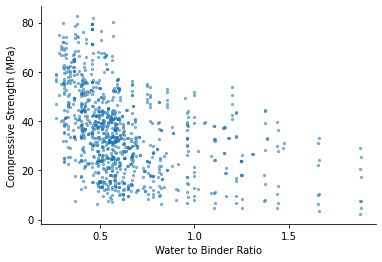

In [12]:
plt.scatter(tmp2[:,8],tmp2[:,-1],s=5,alpha=0.5)
plt.ylabel("Compressive Strength (MPa)")
plt.xlabel("Water to Binder Ratio")
show("WB.pdf")

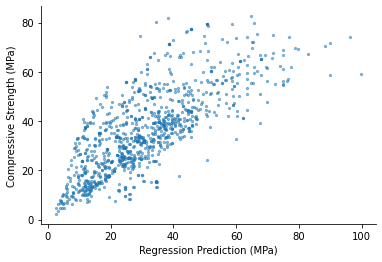

In [13]:
plt.scatter(tmp2[:,10],tmp2[:,-1],s=5,alpha=0.5)
plt.ylabel("Compressive Strength (MPa)")
plt.xlabel("Regression Prediction (MPa)")
show("linmod.pdf")

In [14]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


2021-09-01 11:21:17.555545: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:

X = tmp_norm[:,0:-1]
Y = tmp1[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 
x_train_orig = x_train[:,0:8].copy()
x_test_orig = x_test[:,0:8].copy()
x_test_wc = x_test[:,0:10].copy()
x_train_wc = x_train[:,0:10].copy()
print(x_train.shape)

(824, 11)


In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % (EPOCHS//100) == 0: print(epoch // (EPOCHS//100), end=" ")
    #print('.', end='')

EPOCHS = 10**5
history = model.fit(
  x_train[:,0:8], y_train,
  epochs=EPOCHS, validation_data = (x_test[:,0:8], y_test), verbose=0,
  callbacks=[PrintDot()])



2021-09-01 11:21:17.624565: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


0 1 2 

In [ ]:
def plot_history(history,name="tmp",logscale = 0):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  #print(int(np.log10(hist.shape[0])/1000.0))
  points = np.unique(np.array(10**np.arange(0,(np.log10(hist.shape[0])),(np.log10(hist.shape[0])/1000.0))-1,dtype=int))
  #print(points)
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error (MPa)')
  plt.loglog(hist['epoch'][points], hist['mean_absolute_error'][points],
           label='Train Error')
  plt.semilogy(hist['epoch'][points], hist['val_mean_absolute_error'][points],'--',
           label = 'Test Error')
  #plt.ylim([0,5])
  plt.legend()

  
  show(name, logscale=logscale)


plot_history(history, name="single_layer.pdf",logscale=0)
print(pd.DataFrame(history.history).head(), pd.DataFrame(history.history).shape[0])

In [ ]:
loss, mae, mse = model.evaluate(x_test_orig, y_test, verbose=10)

print("Testing set Mean Abs Error: {:5.2f} MPa".format(mae))
#print(model.predict(x_test).reshape(-1))


In [ ]:

import tensorflow.keras.backend as K
def coeff_determination(y_true, y_pred):
    SS_res =  np.sum(( y_true-y_pred )**2)
    SS_tot = np.sum(( y_true - np.mean(y_true) )**2 )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
print(coeff_determination(y_test,model.predict(x_test_orig).reshape(-1)))

plt.hist(y_test-model.predict(x_test_orig).reshape(-1))
print(np.mean(y_test-model.predict(x_test_orig).reshape(-1)))

In [ ]:
model.save_weights('one-layer-concrete.h5')
model2 = keras.Sequential()
for layer in model.layers[:-1]:
    model2.add(layer)

#set model2 weights as trainable or non-trainable
model2.layers[0].trainable = True

#add another layer
model2.add(layers.Dense(2, activation=tf.nn.tanh, input_shape=[8],
                kernel_initializer=initializers.glorot_normal(seed=42),
                bias_initializer=initializers.glorot_normal(seed=42),
                kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(layers.Dense(1,
                kernel_initializer=initializers.glorot_normal(seed=42),
                bias_initializer=initializers.glorot_normal(seed=42),
                kernel_regularizer=keras.regularizers.l2(0.001)))

model2.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)# RMSprop(0.001)
model2.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [ ]:
#X = tmp_norm[:,0:-1]
#Y = tmp1[:,-1]
#x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.25, random_state=1) 
history2 = model2.fit(
  x_train_orig, y_train,
  epochs=EPOCHS, validation_data = (x_test_orig, y_test), verbose=0,
  callbacks=[PrintDot()])

In [ ]:
plot_history(history2,"two_layer.pdf")

In [ ]:
loss, mae, mse = model2.evaluate(x_test_orig, y_test, verbose=10)

print("Testing set Mean Abs Error: {:5.2f} MPa".format(mae))
coeff_determination(y_test,model2.predict(x_test_orig).reshape(-1))

In [ ]:
plt.hist(y_test-model2.predict(x_test_orig).reshape(-1))
print(np.mean(y_test-model2.predict(x_test_orig).reshape(-1)))

In [ ]:
model2.save_weights('two-layer-concrete.h5')

model3 = keras.Sequential()
for layer in model2.layers[:-1]:
    model3.add(layer)

#set model2 weights as trainable or non-trainable
model3.layers[0].trainable = True
model3.layers[1].trainable = True

#add another layer
model3.add(layers.Dense(2, activation=tf.nn.tanh, input_shape=[8],
                kernel_initializer=initializers.glorot_normal(seed=42),
                bias_initializer=initializers.glorot_normal(seed=42),
                kernel_regularizer=keras.regularizers.l2(0.001)))
model3.add(layers.Dense(1,
                kernel_initializer=initializers.glorot_normal(seed=42),
                bias_initializer=initializers.glorot_normal(seed=42),
                kernel_regularizer=keras.regularizers.l2(0.001)))

model3.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)# RMSprop(0.001)
model3.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [ ]:
#X = tmp_norm[:,0:-1]
#Y = tmp1[:,-1]
#x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.25, random_state=1) 
history3 = model3.fit(
  x_train_orig, y_train,
  epochs=EPOCHS, validation_data = (x_test_orig, y_test), verbose=0,
  callbacks=[PrintDot()])

In [ ]:
plot_history(history3,"three_layer.pdf")

In [ ]:
loss, mae, mse = model3.evaluate(x_test_orig, y_test, verbose=10)

print("Testing set Mean Abs Error: {:5.2f} MPa".format(mae))
model3.save_weights('three-layer-concrete.h5')
coeff_determination(y_test,model3.predict(x_test_orig).reshape(-1))

In [ ]:
model_restore = keras.Sequential()
for layer in model.layers:
    model_restore.add(layer)
model_restore.load_weights('one-layer-concrete.h5')
#plt.scatter(y_test,model_restore.predict(x_test_orig).reshape(-1),marker="o",alpha=0.5)
plt.hist(y_test-model_restore.predict(x_test_orig).reshape(-1),density=True,fill=None,edgecolor="red")
#plt.show()
print(y_test.shape,y_train.shape)
model2_restore = keras.Sequential()
for layer in model2.layers:
    model2_restore.add(layer)

model2_restore.load_weights('two-layer-concrete.h5')

model3_restore = keras.Sequential()
for layer in model3.layers:
    model3_restore.add(layer)

model2_restore.load_weights('two-layer-concrete.h5')
#plt.scatter(y_test,model2_restore.predict(x_test_orig).reshape(-1),marker="^",alpha=0.5)
plt.hist(y_test-model2_restore.predict(x_test_orig).reshape(-1),density=True,fill=None)
#plt.show()
model3_restore.load_weights('three-layer-concrete.h5')

#plt.scatter(y_test,model3_restore.predict(x_test_orig).reshape(-1),marker="*",alpha=0.5)
plt.hist(y_test-model3_restore.predict(x_test_orig).reshape(-1),density=True,fill=None)
plt.show()

## Model with water to binder and log days

In [ ]:
model_newVar = build_model(inp_shape=10)
model_newVar.summary()

In [ ]:
history_newVar = model_newVar.fit(
  x_train_wc, y_train,
  epochs=EPOCHS, validation_data = (x_test_wc, y_test), verbose=0,
  callbacks=[PrintDot()])

In [ ]:
plot_history(history_newVar,"one_layer_new.pdf")
loss, mae, mse = model_newVar.evaluate(x_test_wc, y_test, verbose=10)

print("Testing set Mean Abs Error: {:5.2f} MPa".format(mae))
coeff_determination(y_test,model_newVar.predict(x_test_wc).reshape(-1))

In [ ]:
model_newVar.save_weights('one-layer-concrete_newvar.h5')
model2_newVar = keras.Sequential()
for layer in model_newVar.layers[:-1]:
    model2_newVar.add(layer)

#set model2 weights as trainable or non-trainable
model2_newVar.layers[0].trainable = True

#add another layer
model2_newVar.add(layers.Dense(2, activation=tf.nn.tanh, input_shape=[8],
                kernel_initializer=initializers.glorot_normal(seed=42),
                bias_initializer=initializers.glorot_normal(seed=42),
                kernel_regularizer=keras.regularizers.l2(0.001)))
model2_newVar.add(layers.Dense(1,
                kernel_initializer=initializers.glorot_normal(seed=42),
                bias_initializer=initializers.glorot_normal(seed=42),
                kernel_regularizer=keras.regularizers.l2(0.001)))

model2_newVar.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)# RMSprop(0.001)
model2_newVar.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [ ]:
history2_newvar = model2_newVar.fit(
  x_train_wc, y_train,
  epochs=EPOCHS, validation_data = (x_test_wc, y_test), verbose=0,
  callbacks=[PrintDot()])

In [ ]:
plot_history(history2_newvar,"two_layer_new.pdf")
loss, mae, mse = model2_newVar.evaluate(x_test_wc, y_test, verbose=10)

print("Testing set Mean Abs Error: {:5.2f} MPa".format(mae))
coeff_determination(y_test,model2_newVar.predict(x_test_wc).reshape(-1))

In [ ]:
model2_newVar.save_weights('two-layer-concrete_newvar.h5')

## Model with Lin model

In [ ]:
model_lin = build_model(inp_shape=11)
model_lin.summary()

In [ ]:
history_lin = model_lin.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_data = (x_test, y_test), verbose=0,
  callbacks=[PrintDot()])

In [ ]:
plot_history(history_lin,"one_layer_new.pdf")
loss, mae, mse = model_lin.evaluate(x_test, y_test, verbose=10)

print("Testing set Mean Abs Error: {:5.2f} MPa".format(mae))
coeff_determination(y_test,model_lin.predict(x_test).reshape(-1))

In [ ]:
model_lin.save_weights('one-layer-concrete_lin.h5')
model2_lin = keras.Sequential()
for layer in model_lin.layers[:-1]:
    model2_lin.add(layer)

#set model2 weights as trainable or non-trainable
model2_lin.layers[0].trainable = True

#add another layer
model2_lin.add(layers.Dense(2, activation=tf.nn.tanh, input_shape=[8],
                kernel_initializer=initializers.glorot_normal(seed=42),
                bias_initializer=initializers.glorot_normal(seed=42),
                kernel_regularizer=keras.regularizers.l2(0.001)))
model2_lin.add(layers.Dense(1,
                kernel_initializer=initializers.glorot_normal(seed=42),
                bias_initializer=initializers.glorot_normal(seed=42),
                kernel_regularizer=keras.regularizers.l2(0.001)))

model2_lin.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)# RMSprop(0.001)
model2_lin.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [ ]:
history2_lin = model2_lin.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_data = (x_test, y_test), verbose=0,
  callbacks=[PrintDot()])

In [ ]:
plot_history(history2_lin,"one_layer_new.pdf")
loss, mae, mse = model2_lin.evaluate(x_test, y_test, verbose=10)

print("Testing set Mean Abs Error: {:5.2f} MPa".format(mae))
coeff_determination(y_test,model2_lin.predict(x_test).reshape(-1))

In [ ]:
model2_lin.save_weights('two-layer-concrete_lin.h5')